In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

%matplotlib inline

In [2]:
np.__version__

'1.24.4'

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [3]:
data= pd.read_excel('../data.xlsx',sheet_name='Sheet6')
data=data.drop(['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)


#Pycaret

In [4]:
x=data.drop(['Isc'], axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=5,

            keep_features=['DROP',  'FWHM 1', 'FWHM 2', 'FWHM 3', 'FWHM 4', 'FWHM 5',
       'FWHM 6', '2-theta 1', '2-theta 2', '2-theta 3', '2-theta 4',
       '2-theta 5', '2-theta 6', 'Intensity 1', 'Intensity 2', 'Intensity 3',
       'Intensity 4', 'Intensity 5', 'Intensity 6', 'relative_intensity 1',
       'relative_intensity 2', 'relative_intensity 3', 'relative_intensity 4',
       'relative_intensity 5', 'relative_intensity 6'
     #   'PL_amplitude_peak1',
     #   'PL_amplitude_peak2', 'PL_fwhm_peak1', 'PL_fwhm_peak2',
     #   'PL_peak_positions_peak1', 'PL_peak_positions_peak2',
     #   'PL_relative_amplitude_peak1', 'PL_relative_amplitude_peak2'
       ]


            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543

            )

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 48)"
4,Transformed data shape,"(27, 31)"
5,Transformed train set shape,"(21, 31)"
6,Transformed test set shape,"(6, 31)"
7,Numeric features,47
8,Keep features,25
9,Preprocess,True


In [5]:
best = compare_models(cross_validation=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:36:14
Status,. . . . . . . . . . . . . . . . . .,Fitting Linear Regression
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3946,0.2780,0.5272,0.9603,0.0113,0.0089,0.1200
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0500
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,1.0400
rf,Random Forest Regressor,0.9075,1.2116,1.1007,0.8268,0.0261,0.0219,0.3100
ada,AdaBoost Regressor,1.2102,1.5909,1.2613,0.7726,0.0283,0.0281,0.1500
et,Extra Trees Regressor,1.3782,2.0007,1.4145,0.7141,0.0326,0.0324,0.2000
par,Passive Aggressive Regressor,1.1058,2.1101,1.4526,0.6984,0.0341,0.0268,0.0600
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.1000
ridge,Ridge Regression,1.1958,2.3192,1.5229,0.6685,0.0354,0.0285,0.1000
huber,Huber Regressor,1.4011,2.7383,1.6548,0.6086,0.0374,0.0326,0.0600


In [6]:
best

GradientBoostingRegressor(random_state=1543)

In [7]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.3946,0.2780,0.5272,0.9603,0.0113,0.0089
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
xgboost=create_model('xgboost',cross_validation = False, return_train_score=True)
evaluate_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175
Train,0.0011,0.0000,0.0013,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
plot_model(gbr, plot = 'learning', save=True)

'Learning Curve.png'

In [17]:
plot_model(gbr, plot = 'residuals', save=True)

'Residuals.png'

In [18]:
plot_model(gbr, plot = 'error', save=True)

'Prediction Error.png'

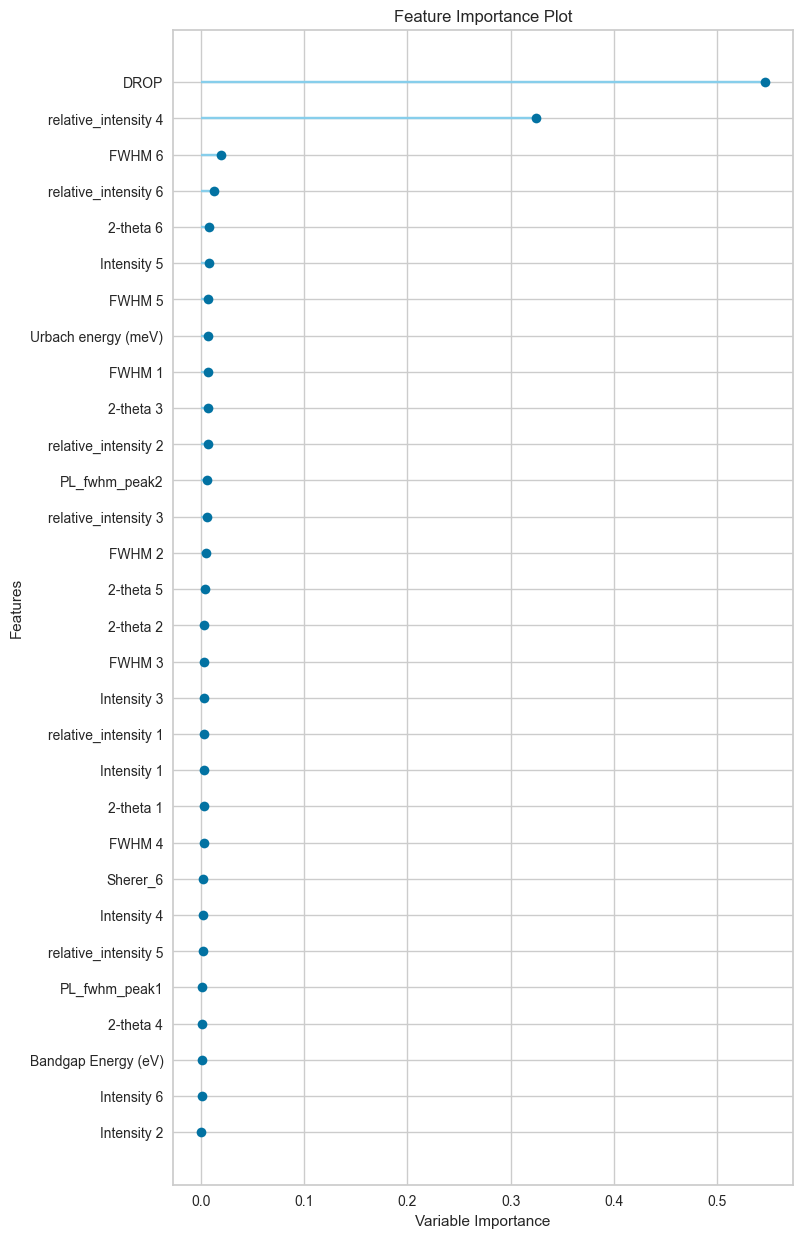

In [19]:
plot_model(gbr, plot = 'feature_all')

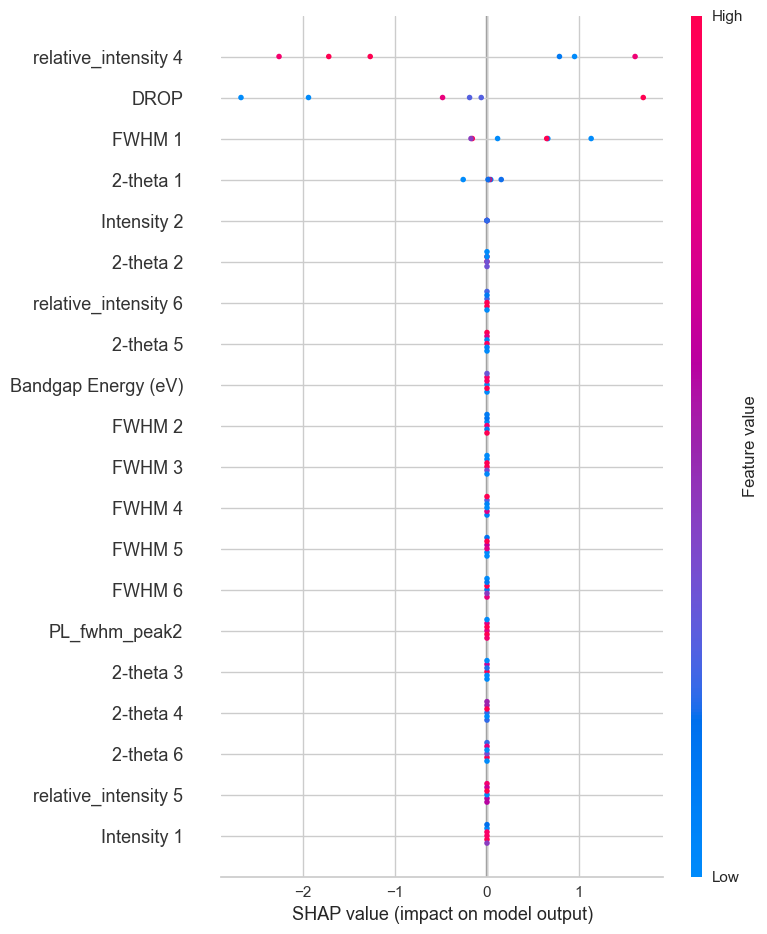

In [11]:
interpret_model(xgboost)

In [35]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
evaluate_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.9102,1.2021,1.0964,0.8282,0.0259,0.0219
Train,0.6907,0.7930,0.8905,0.8471,0.0204,0.0160


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

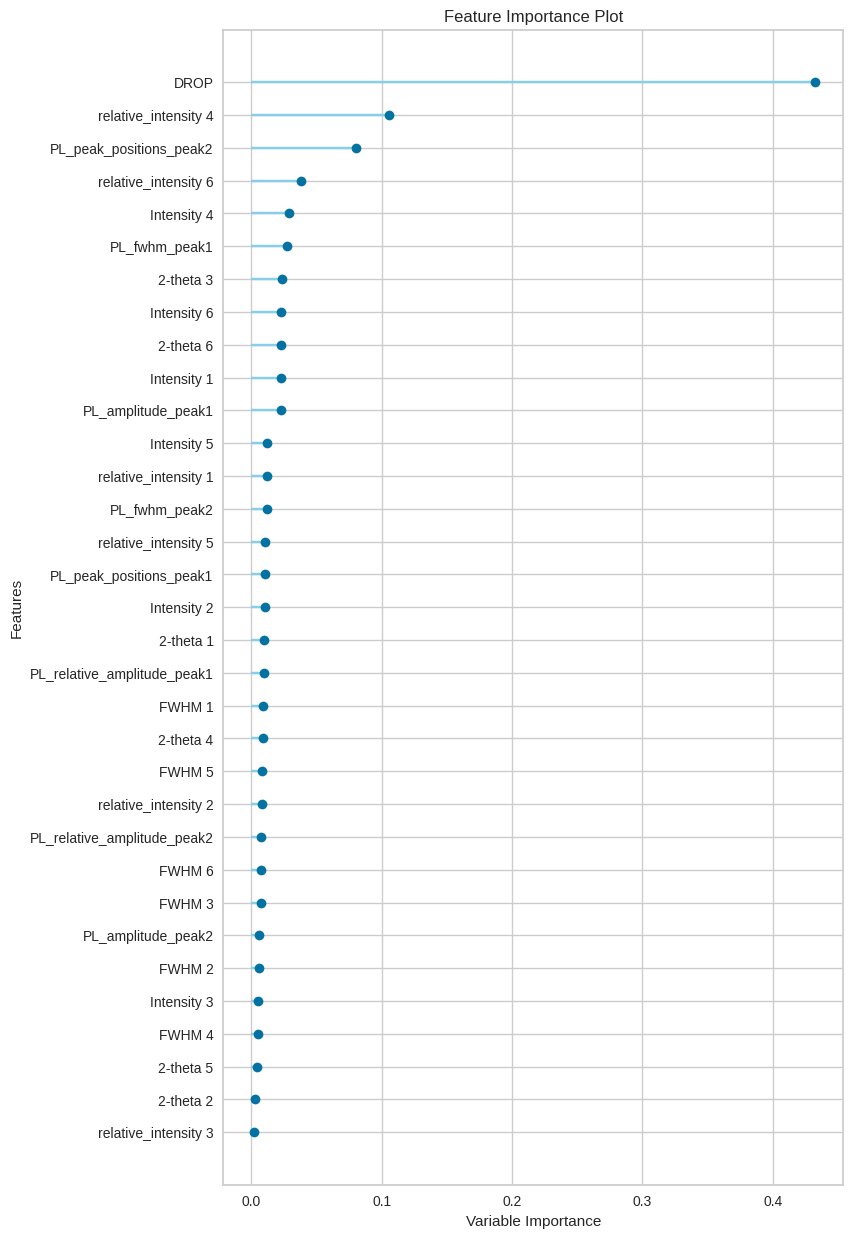

In [36]:
plot_model(rf, plot = 'feature_all')